In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy as sc
from scipy.special import i0, i1, k0, k1
from scipy.interpolate import interp1d
G=4.302e-6
import seaborn as sns

In [ ]:
dir="/home/esha/Documents/anurag/nav"
meta=[]
with open('meta.txt','r') as file: 
    line=file.readlines()
for lines in line:
    text=lines.strip().split()
    meta.append(text)

In [ ]:
gal_rej=[]
for i in range(len(meta)):
    if int(meta[i][-2])==3 or float(meta[i][5])<30:
        gal_rej.append(meta[i][0])

In [2]:
def bulge_pot(r,rho_0,a):
    temp=-(G*2*np.pi*rho_0*(a**3))/(r+a)
    return temp

In [3]:
bulge_pot(0.5,0,0)

-0.0

In [4]:
def disk_pot(r,sg0,R_d):
    y=r/(2*R_d)
    temp=-np.pi*G*sg0*r*(i0(y)*k1(y)-i1(y)*k0(y))
    return temp   

In [5]:
def gas_pot(r,HI_mass,r_dg):
    sg0 = 2*HI_mass/(3*np.pi*r_dg**2)
    y=r/(2*r_dg)
    temp=-np.pi*G*sg0*r*(i0(y)*k1(y)-i1(y)*k0(y))
    return temp

In [6]:
def pot(x,gammad,gammab,rho_b,ab,sg0d,R_d,HI_mass,r_g):
    temp=gammab*bulge_pot(x,rho_b,ab)+gammad*disk_pot(x,sg0d,R_d)+gas_pot(x,HI_mass,r_g)
    return temp

In [11]:
dsingle=combined_gal[combined_gal['Galaxy']=='UGC03546']
dsingle.head()
gas_ip=interp1d(dsingle['Rad'],dsingle['Vgas'],fill_value="extrapolate")
disk_ip=interp1d(dsingle['Rad'],dsingle['Vdisk'],fill_value="extrapolate")
bulge_ip=interp1d(dsingle['Rad'],dsingle['Vbul'],fill_value="extrapolate")

In [12]:
rk=np.linspace(0.1,10)
(gas_ip(rk)**2+disk_ip(rk)**2+bulge_ip(rk)**2)/rk

array([2179471.40478125,  639600.93599297,  339144.03266699,
        214211.0157793 ,  147703.6229547 ,  108129.49698729,
         83648.3654936 ,   67344.61665274,   56429.43523783,
         48526.58692491,   42877.44719978,   38554.00517096,
         34976.38742369,   31963.2923732 ,   29315.27817352,
         26811.75338665,   24516.53425522,   22499.02714977,
         20714.18538996,   19126.205034  ,   17706.26999665,
         16393.6371845 ,   15199.64548949,   14114.61002437,
         13125.18645911,   12220.12410661,   11389.8708204 ,
         10626.26411235,   10066.0011791 ,    9549.41114999,
          9068.81857859,    8620.79458584,    8202.33237413,
          7810.78422062,    7445.78394795,    7142.05640358,
          6855.82932828,    6585.70249592,    6330.42117752,
          6088.85772152,    5859.99586323,    5648.34448013,
          5474.11131297,    5308.98432322,    5152.34954162,
          5003.64698017,    4862.36482716,    4728.03437537,
          4589.37029205,

In [9]:
dir="/home/esha/Documents/anurag/nav"
meta=[]
with open('metadata.txt','r') as file: 
    line=file.readlines()
for lines in line:
    text=lines.strip().split()
    meta.append(text)

In [30]:
gal_rej=[]
for i in range(len(meta)):
    if int(meta[i][-2])==3 or float(meta[i][5])<30:
        gal_rej.append(meta[i][0])

In [32]:
len(gal_rej)

22

In [33]:
175-22

153

In [10]:
column_names=["Rad","Vobs","errV","Vgas","Vdisk","Vbul","SBdisk","SBbul"]

gal_data=[]
for gal in os.listdir(dir):
    if gal.endswith('.csv'):
        gal_dir=os.path.join(dir,gal)
        data=pd.read_csv(gal_dir,names=column_names)
        data['Galaxy']=os.path.splitext(gal)[0]
        gal_data.append(data)
        
combined_gal=pd.concat(gal_data)
combined_gal.head()

,Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul,Galaxy
0,0.63,262.0,73.6,-0.79,82.82,389.26,1981.83,3538.94,UGC03546
1,0.79,250.0,55.5,-0.85,98.90,366.12,1833.29,1444.35,UGC03546
2,0.95,241.0,42.9,-0.88,113.48,343.54,1695.88,614.37,UGC03546
3,1.11,234.0,31.9,-0.87,126.74,322.48,1568.78,245.76,UGC03546
4,1.27,228.0,28.8,-0.80,138.83,303.96,1451.19,56.22,UGC03546


In [28]:
MHI=[]
for i in range(len(meta)):
    MHI.append(float(meta[i][-6])*1e+9)
type(MHI[1:10])
    

list

In [29]:
rg=[]
with open("gas_fit.txt",'r') as file:
    line=file.readlines()
for lines in line:
    text=lines.strip().split()
    rg.append(text)
rg[1]

['UGC03546', '1.1122963487164713e+20']

In [30]:
gas_df=pd.DataFrame(rg[1:],columns=["Galaxy","Rd"])
gas_df[gas_df['Galaxy']=='UGC03546']['Rd'].values.astype(float)

array([1.11229635e+20])

In [31]:
gas_df.head()

,Galaxy,Rd
0,UGC03546,1.1122963487164713e+20
1,UGC05764,4.337348247835531e+19
2,DDO168,3.600238825925971e+19
3,NGC5055,1.6204478403075188e+20
4,F565-V2,8.035030767002829e+19


In [32]:
bulge_par=[]
with open("bulge_fit.txt",'r') as file:
    text=file.readlines()
for line in text:
    temp=line.strip().split()
    bulge_par.append(temp)


bulge_df=pd.DataFrame(bulge_par[1:],columns=['Galaxy', 'sb', 'rb'])
bulge_df.tail()

,Galaxy,sb,rb
133,F568-V1,0,0
134,NGC4217,1.0369035569650848e-19,7.021193892582736e+19
135,NGC2683,9.999999999999959e-15,5.560093021071779e+17
136,UGC07323,0,0
137,UGC02916,1.6621809880877962e-19,6.0423199473144455e+19


In [33]:
disk_par=[]
with open("disk_fit.txt",'r') as file:
    line=file.readlines()
for lines in line:
    text=lines.strip().split()
    disk_par.append(text)
disk_df=pd.DataFrame(disk_par[1:],columns=['Galaxy', 'Md', 'Rd_fit'])
disk_df.head()

,Galaxy,Md,Rd_fit
0,UGC03546,4.28638001305367,7.055247786993426e+19
1,UGC05764,0.03167933870927417,2.7933853136443593e+19
2,DDO168,0.04998767095377364,3.736400054277554e+19
3,NGC5055,7.931095729263137,7.185733248499658e+19
4,F565-V2,0.03004013048715883,8.310321235812683e+19


In [34]:
sparc=[]
for file in os.listdir(dir):
    #print(file)
    if file.endswith('.csv'):
        gal=os.path.splitext(file)[0]
        sparc.append(gal)

sparc[0:5]      

['UGC03546', 'UGC05764', 'DDO168', 'NGC5055', 'F565-V2']

In [35]:
sparc.index('UGC03546')

0

In [36]:
float(bulge_df.iloc[0]['sb'])

8.69661252336958e-16

In [37]:
float(disk_df.iloc[0]['Rd_fit'])*3.24e-20

2.2859002829858697

def net_pot(df,gal,mg,rg,dk_df,bg_df):
    gal_data = df[df['Galaxy'] == gal]
    rad = gal_data['Rad'].values
    idx=gal.index(gal)
    mg0 = mg[idx]
    rg0 = float(rg.iloc[idx]['Rd'])*3.24e-20
    sd0=float(dk_df.iloc[idx]['Md'])*4.7871e8
    rd0=float(dk_df.iloc[idx]['Rd_fit'])*3.24e-20
    sb0=float(bg_df.iloc[idx]['sb'])*1.477e28
    rb0=float(bg_df.iloc[idx]['rb'])*3.24e-20
    rx=np.linspace(rad.min(),rad.max(),len(rad))
    net_p=pot(rx,0.5,0.6,sb0,rb0,sd0,rd0,mg0,rg0)
    return net_p

In [38]:
def vbar(gal,rad):
    dsingle=combined_gal[combined_gal['Galaxy']==gal]
    gas_ip=interp1d(dsingle['Rad'],dsingle['Vgas'],fill_value="extrapolate")
    disk_ip=interp1d(dsingle['Rad'],dsingle['Vdisk'],fill_value="extrapolate")
    bulge_ip=interp1d(dsingle['Rad'],dsingle['Vbul'],fill_value="extrapolate")
    temp=np.sqrt(0.5*disk_ip(rad)**2+(abs(gas_ip(rad))*gas_ip(rad))+0.6*bulge_ip(rad)**2)
    return temp

In [107]:
rnav=[]
delnav=[]
def net_pot(df, gal, mg, rg, dk_df, bg_df):
    gal_data = df[df['Galaxy'] == gal]
    rad = gal_data['Rad'].values
    idx = gal.index(gal)
    mg0 = mg[idx]
    rg0 = float(rg.iloc[idx]['Rd']) * 3.24e-20
    sd0 = float(dk_df.iloc[idx]['Md']) * 4.7871e8
    rd0 = float(dk_df.iloc[idx]['Rd_fit']) * 3.24e-20
    sb0 = float(bg_df.iloc[idx]['sb']) * 1.477e28
    rb0 = float(bg_df.iloc[idx]['rb']) * 3.24e-20
    
    rx = np.linspace(rad.min(), rad.max(), len(rad))  # Ensure rx has the same length as rad
    
    #print(f"rx length: {len(rx)}, rad length: {len(rad)}")  # Debug statement
    rmax=rad.max()
    rtheta=rad/rmax
    
    nr=np.linspace(0.2,0.9,len(rad))
    nrad=nr*rmax
    #net_potential = -1/pot(rx, 0.5, 0.6, sb0, rb0, sd0, rd0, mg0, rg0)
    numerator= (vbar(gal,nrad)**2)/pot(nrad, 0.8, 0.8, sb0, rb0, sd0, rd0, mg0, rg0)
    denom=(vbar(gal,rmax)**2)/pot(rmax, 0.8, 0.8, sb0, rb0, sd0, rd0, mg0, rg0)
    #numerator= vbar(gal,nr)**2/pot(nr, 0.5, 0.6, sb0, rb0, sd0, rd0, mg0, rg0)
    #denom=vbar(gal,1)/pot(1, 0.5, 0.6, sb0, rb0, sd0, rd0, mg0, rg0)
    nav=numerator/denom
    #print(f"net_potential length: {len(nav)}, rx length: {len(rx)}")  # Debug statement
    print(f"{gal}")
    
    print(f"rx: {rtheta}")
    print(f"net_potential: {nav}")
    #plt.figure()
    plt.plot(nr,nav,color='gray')
    rnav.append(nr)
    delnav.append(nav)
    plt.savefig("rggr_nav.pdf")

    return nav




In [108]:
sparc2=sparc[0:10]
sparc2

['UGC03546',
 'UGC05764',
 'DDO168',
 'NGC5055',
 'F565-V2',
 'UGC04499',
 'NGC4088',
 'NGC4183',
 'NGC3949',
 'NGC6674']

In [109]:
len(sparc)

138

UGC03546
rx: [0.0215532  0.02702703 0.03250086 0.03797468 0.04344851 0.04892234
 0.05439617 0.06500171 0.07047554 0.07594937 0.0814232  0.09544988
 0.09784468 0.10331851 0.14266165 0.19021553 0.23811153 0.28566541
 0.33287718 0.38111529 0.42798495 0.4748546  0.5251454  0.57201505
 0.61854259 0.66541225 0.71570304 0.7841259  0.85596989 1.        ]
net_potential: [0.65936414 0.68526254 0.71259613 0.745129   0.78265038 0.8273108
 0.8622527  0.88529293 0.90747609 0.9288626  0.9536569  0.98129161
 1.00872404 1.03522556 1.05486361 1.06756574 1.07473483 1.07699776
 1.07606971 1.07222571 1.06729829 1.06055093 1.05370387 1.0460064
 1.03632663 1.03136002 1.02640418 1.01989977 1.01854692 1.01734943]
UGC05764
rx: [0.09944751 0.20165746 0.30110497 0.40055249 0.5        0.59944751
 0.70165746 0.80110497 0.90055249 1.        ]
net_potential: [0.07833021 0.14597713 0.23292686 0.3468996  0.49021984 0.63442775
 0.76498465 0.87799216 0.95696968 0.98323388]
DDO168
rx: [0.09951456 0.19902913 0.30097087 0.3

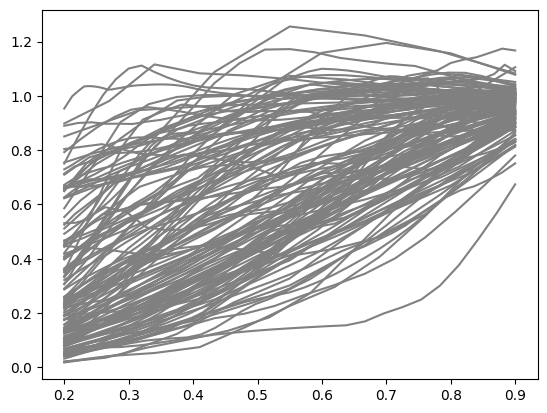

In [110]:
for gal in sparc:
    try:
        net = net_pot(combined_gal, gal, MHI, gas_df, disk_df, bulge_df)
        #rad = net[1]
        #potential = net[0]
        #print(rad)
        #print(potential)
    except Exception as e:
        print(f"Error processing galaxy {gal}: {e}")

In [100]:
len(combined_gal[combined_gal['Galaxy']=='UGC03546'])

30

In [101]:
comb_rnav=np.concatenate((rnav))
comb_delnav=np.concatenate((delnav))
nav_df = pd.DataFrame({'comb_rnav': comb_rnav, 'comb_delnav': comb_delnav})

In [102]:
nav_df.head()

,comb_rnav,comb_delnav
0,0.200000,0.659364
1,0.224138,0.685263
2,0.248276,0.712596
3,0.272414,0.745129
4,0.296552,0.782650


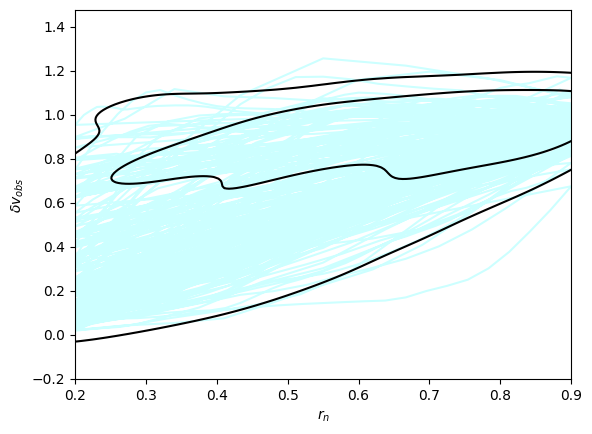

In [125]:
plt.plot(nav_df['comb_rnav'],nav_df['comb_delnav'],color='cyan',alpha=0.2)
t=sns.kdeplot(data=nav_df,x=comb_rnav,y=comb_delnav,bw_method="silverman",levels=3,color='black')
#sns.lineplot(data=nav_df,x=comb_rnav,y=comb_delnav)
plt.xlim(0.2,0.9)
plt.xlabel("$r_n$")
plt.ylabel("$\delta v_{obs}$")
plt.savefig('rggr_nav.jpg')

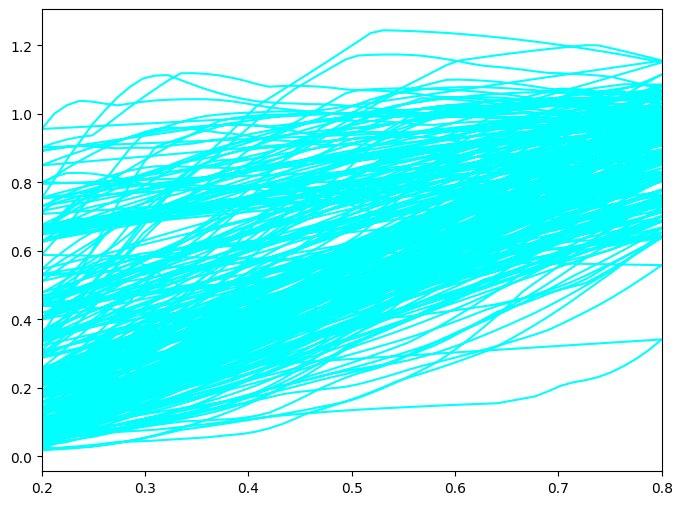

Area inside contour level 1: 0.5764
Area inside contour level 2: 0.1860


In [169]:
plt.figure(figsize=(8, 6))
plt.plot(nav_df['comb_rnav'], nav_df['comb_delnav'], color='cyan')
#sns.lineplot(data=nav_df, x='comb_rnav', y='comb_delnav', ax=ax, color='cyan')
#ax = sns.kdeplot(data=nav_df, x='comb_rnav', y='comb_delnav', bw_method='silverman', levels=3, color='black')

plt.xlim(0.2, 0.8)

# Extract the contours from the seaborn plot
contour = ax.collections[0].get_paths()

# Function to calculate the area of a polygon
def polygon_area(x, y):
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Calculate the area inside each contour
areas = []
for i, path in enumerate(contour):
    polygon = path.to_polygons()
    if polygon:
        x, y = polygon[0][:, 0], polygon[0][:, 1]
        area = polygon_area(x, y)
        areas.append(area)

plt.show()

# Print areas
for i, area in enumerate(areas):
    print(f"Area inside contour level {i+1}: {area:.4f}")

In [67]:
delta_vobs=[]
rn_obs=[]
def deltaobs(df,gal):
    gal_data=df[df['Galaxy']==gal]
    rad=gal_data['Rad'].values
    vgas=gal_data['Vgas'].values
    vdisk=gal_data['Vdisk'].values
    #print(vdisk)
    vbulge=gal_data['Vbul'].values
    vobs=gal_data['Vobs'].values
    vobs_ip=interp1d(rad,vobs,fill_value="extrapolate")
    rx = np.linspace(rad.min(), rad.max(), len(rad))  
    rmax=rad.max()
    nr=np.linspace(0.1,0.9, len(rad))
    nrad=nr*rmax
    rtheta=rad/rmax
    # Call the pot function
    #net_potential = -1/pot(rx, 0.5, 0.6, sb0, rb0, sd0, rd0, mg0, rg0)
    numerator= (vobs_ip(rad)**2-vbar(gal,rad)**2)
    denom=(vobs_ip(rmax)**2-vbar(gal,rmax)**2)
    #numerator= vbar(gal,nr)**2/pot(nr, 0.5, 0.6, sb0, rb0, sd0, rd0, mg0, rg0)
    #denom=vbar(gal,1)/pot(1, 0.5, 0.6, sb0, rb0, sd0, rd0, mg0, rg0)
    delta_v=numerator/denom
    rn_obs.append(rtheta)
    delta_vobs.append(delta_v)
    #print(f"net_potential length: {len(nav)}, rx length: {len(rx)}")  # Debug statement
    print(f"{gal}")
    #print(delta_v)
    return delta_v

In [68]:
for gal in sparc:
    try:
        net = deltaobs(combined_gal, gal)
    except Exception as e:
        print(f"Error processing galaxy {gal}: {e}")

UGC03546
UGC05764
DDO168
NGC5055
F565-V2
UGC04499
NGC4088
NGC4183
NGC3949
NGC6674
NGC5033
NGC3953
NGC6946
UGC09037
NGC3741
NGC2976
NGC0024
UGC05716
NGC4085
UGC07524
NGC6015
UGC08490
NGC3877
NGC2841
NGC7793
UGC07125
NGC7331
UGC03580
UGC06930
UGC07399
UGC12506
UGC06446
UGC08550
UGC07690
NGC4010
ESO563-G021
NGC4051
F571-V1
DDO064
UGC08699
NGC4138
ESO444-G084
NGC3769
NGC7814
UGC06667
NGC6195
NGC3198
UGC07261
NGC5585
NGC4013
UGC06983
UGC07603
NGC3972
UGC05414
NGC0289
NGC2915
NGC0300
UGC00731
UGC12732
NGC4157
UGC09133
UGC06923
NGC4100
NGC3109
UGC07089
DDO170
UGC09992
NGC4068
F571-8
UGC06917
NGC4559
NGC0100
UGC08286
UGC04483
NGC0891
NGC5985
NGC3521
ESO116-G012
IC2574
UGC02885
UGC06787
F574-1
UGC06614
NGC0055
KK98-251
UGC05829
UGC08837
UGC07577
UGCA444
UGC05005
UGC06818
UGC05986
UGC07151
UGC05750
UGC00191
F583-4
UGC11557
NGC3893
UGC00128
UGC00891
UGC05918
IC4202
DDO154
NGC3992
UGC07559
UGC07866
NGC2955
NGC0801
UGC03205
UGC02953
UGC11914
UGC10310
UGC02259
UGC11455
UGC12632
NGC1090
CamB
UGC05721

In [69]:
comb_robs=np.concatenate((rn_obs))
comb_vobs=np.concatenate((delta_vobs))
obs_df=pd.DataFrame({'rn_obs': comb_robs,'delta_vobs': comb_vobs})
obs_df.head()

,rn_obs,delta_vobs
0,0.021553,-0.903892
1,0.027027,-0.802499
2,0.032501,-0.674215
3,0.037975,-0.551177
4,0.043449,-0.460309


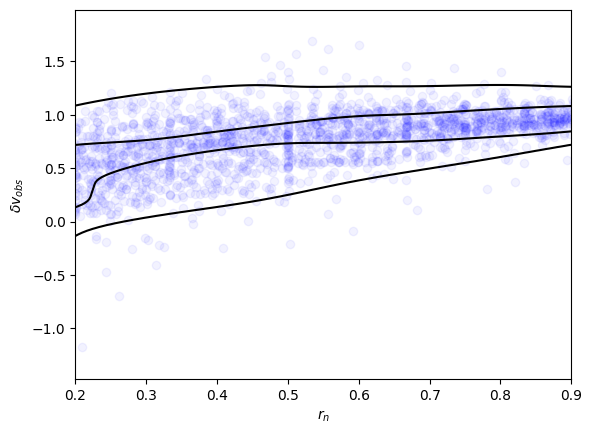

In [126]:
plt.scatter(obs_df['rn_obs'],obs_df['delta_vobs'],color='blue',alpha=0.05)
sns.kdeplot(data=obs_df,x='rn_obs',y='delta_vobs',levels=3,bw_method='silverman',color='black')
plt.xlim(0.2, 0.9)
plt.xlabel("$r_n$")
plt.ylabel("$\delta v_{obs}$")
plt.savefig("obs_nav.jpg")

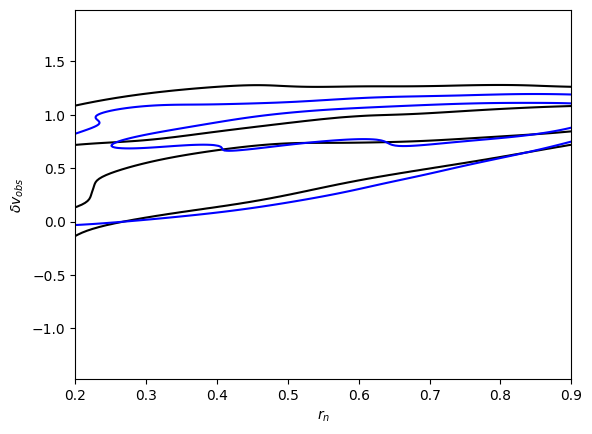

In [127]:
sns.kdeplot(data=obs_df,x='rn_obs',y='delta_vobs',levels=3,bw_method='silverman',color='black')
sns.kdeplot(data=nav_df,x=comb_rnav,y=comb_delnav,bw_method="silverman",levels=3,color='blue')
plt.xlim(0.2, 0.9)
#plt.xlabel('rn')
plt.xlabel("$r_n$")
plt.ylabel("$\delta v_{obs}$")
plt.savefig("comparison.jpg")